In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

In [3]:
data = yf.Ticker('AAPL')
data

yfinance.Ticker object <AAPL>

In [ ]:
df = data.history('120mo')

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-10-25 00:00:00-04:00,16.561075,16.620609,16.367512,16.394007,337792000,0.0,0.0
2013-10-28 00:00:00-04:00,16.490003,16.551097,16.308284,16.516186,550440800,0.0,0.0
2013-10-29 00:00:00-04:00,16.715357,16.808242,16.038040,16.104742,635807200,0.0,0.0
2013-10-30 00:00:00-04:00,16.196078,16.442630,16.115348,16.360966,354163600,0.0,0.0
2013-10-31 00:00:00-04:00,16.364084,16.441696,16.247820,16.292393,275696400,0.0,0.0


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-18 00:00:00-04:00,175.580002,177.580002,175.110001,175.839996,54764400,0.0,0.0
2023-10-19 00:00:00-04:00,176.039993,177.839996,175.190002,175.460007,59302900,0.0,0.0
2023-10-20 00:00:00-04:00,175.309998,175.419998,172.639999,172.880005,64189300,0.0,0.0
2023-10-23 00:00:00-04:00,170.910004,174.009995,169.929993,173.000000,55980100,0.0,0.0
2023-10-24 00:00:00-04:00,173.050003,173.669998,171.449997,173.440002,43764100,0.0,0.0


In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-10-25 00:00:00-04:00,16.561075,16.620609,16.367512,16.394007,337792000,0.0,0.0
1,2013-10-28 00:00:00-04:00,16.490003,16.551097,16.308284,16.516186,550440800,0.0,0.0
2,2013-10-29 00:00:00-04:00,16.715357,16.808242,16.038040,16.104742,635807200,0.0,0.0
3,2013-10-30 00:00:00-04:00,16.196078,16.442630,16.115348,16.360966,354163600,0.0,0.0
4,2013-10-31 00:00:00-04:00,16.364084,16.441696,16.247820,16.292393,275696400,0.0,0.0


In [ ]:
df = df.drop(['Date', 'Dividends', 'Stock Splits'], axis=1)

In [ ]:
df.head()

,Open,High,Low,Close,Volume
0,16.561075,16.620609,16.367512,16.394007,337792000
1,16.490003,16.551097,16.308284,16.516186,550440800
2,16.715357,16.808242,16.038040,16.104742,635807200
3,16.196078,16.442630,16.115348,16.360966,354163600
4,16.364084,16.441696,16.247820,16.292393,275696400


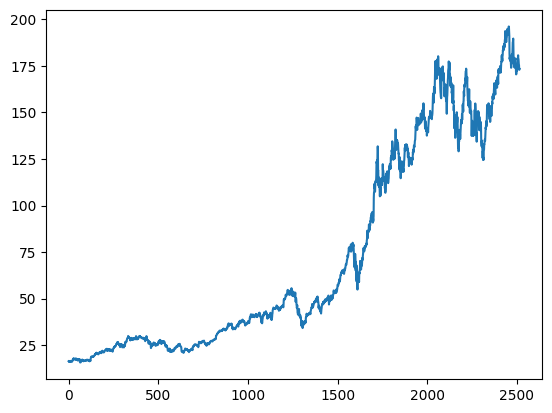

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    182.406862
2512    182.409528
2513    182.367719
2514    182.327609
2515    182.263538
Name: Close, Length: 2516, dtype: float64

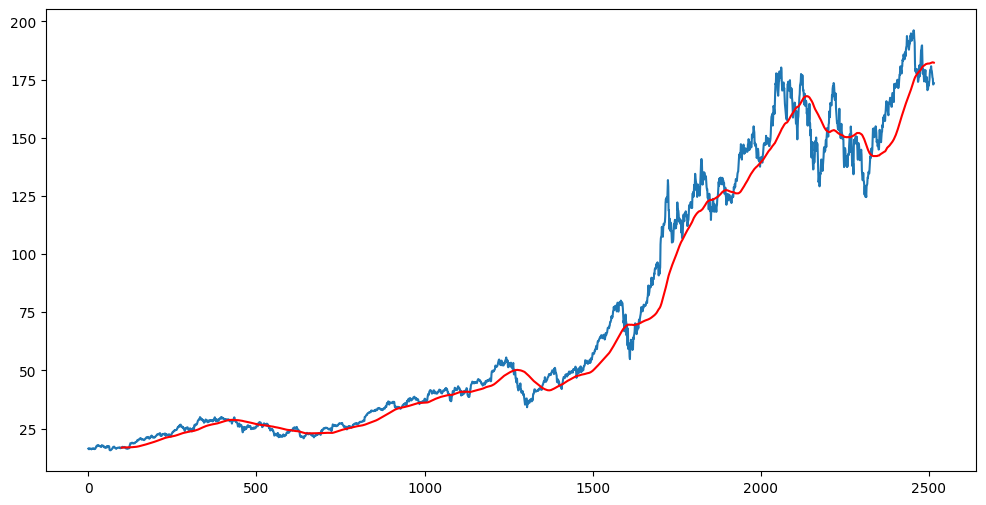

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    168.733340
2512    168.987947
2513    169.223231
2514    169.465787
2515    169.687640
Name: Close, Length: 2516, dtype: float64

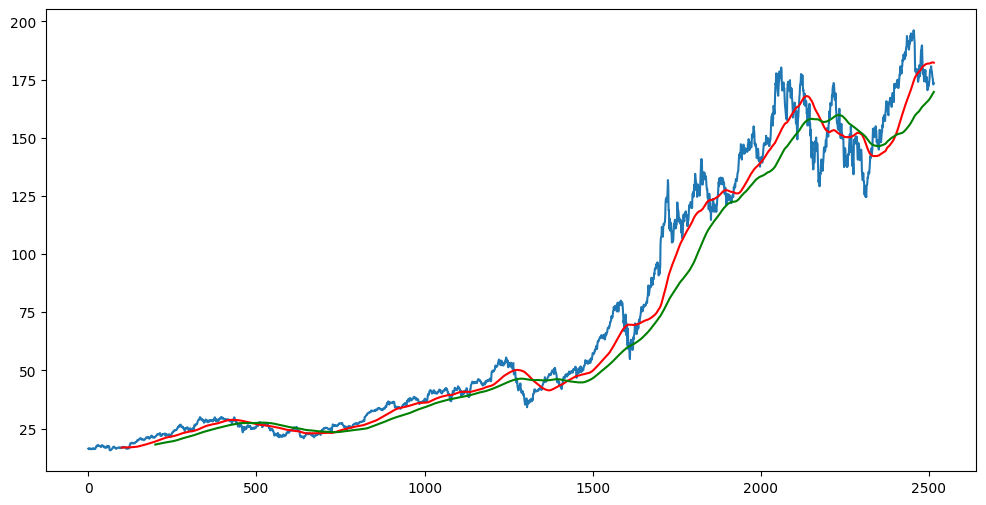

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(2516, 5)

In [ ]:
# splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0062437 ],
       [0.0072958 ],
       [0.0037528 ],
       ...,
       [0.85900125],
       [0.85358796],
       [0.84411474]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train, y_train, = np.array(x_train), np.array(y_train)

In [ ]:
# ML model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 25s 345ms/step - loss: 0.0173
Epoch 2/50
52/52 [==============================] - 16s 318ms/step - loss: 0.0041
Epoch 3/50
52/52 [==============================] - 17s 319ms/step - loss: 0.0035
Epoch 4/50
52/52 [==============================] - 18s 344ms/step - loss: 0.0029
Epoch 5/50
52/52 [==============================] - 18s 353ms/step - loss: 0.0042
Epoch 6/50
52/52 [==============================] - 16s 305ms/step - loss: 0.0028
Epoch 7/50
52/52 [==============================] - 17s 329ms/step - loss: 0.0027
Epoch 8/50
52/52 [==============================] - 16s 302ms/step - loss: 0.0027
Epoch 9/50
52/52 [==============================] - 16s 303ms/step - loss: 0.0028
Epoch 10/50
52/52 [==============================] - 16s 307ms/step - loss: 0.0026
Epoch 11/50
52/52 [==============================] - 17s 333ms/step - loss: 0.0027
Epoch 12/50
52/52 [==============================] - 17s 334ms/step - loss: 0.0023
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-32-1e7e7f089a7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [ ]:
final_df.head()

,Close
0,79.693214
1,79.006905
2,81.257088
3,81.737518
4,84.318626


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test, y_test, = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
# Making Predictons

y_predicted = model.predict(x_test)

24/24 [==============================] - 5s 165ms/step


In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
y_predicted

array([[0.339212  ],
       [0.33915794],
       [0.337726  ],
       [0.33533818],
       [0.33196086],
       [0.327829  ],
       [0.3224242 ],
       [0.31523466],
       [0.3065073 ],
       [0.2974822 ],
       [0.29010034],
       [0.2858049 ],
       [0.2843758 ],
       [0.28528294],
       [0.28812766],
       [0.29254538],
       [0.2981379 ],
       [0.30456632],
       [0.31140763],
       [0.3181173 ],
       [0.32424152],
       [0.32935238],
       [0.33289444],
       [0.33471915],
       [0.3349905 ],
       [0.33407837],
       [0.33253503],
       [0.33117074],
       [0.33072552],
       [0.33166784],
       [0.33408588],
       [0.33791938],
       [0.34300426],
       [0.34873885],
       [0.35463494],
       [0.36021912],
       [0.3650718 ],
       [0.3695625 ],
       [0.37415755],
       [0.37926042],
       [0.38478875],
       [0.39064336],
       [0.39708388],
       [0.40413302],
       [0.4117335 ],
       [0.42028382],
       [0.42972618],
       [0.439

In [ ]:
scaler.scale_

array([0.00853401])

In [ ]:
scale_factor = 1/0.00853401
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

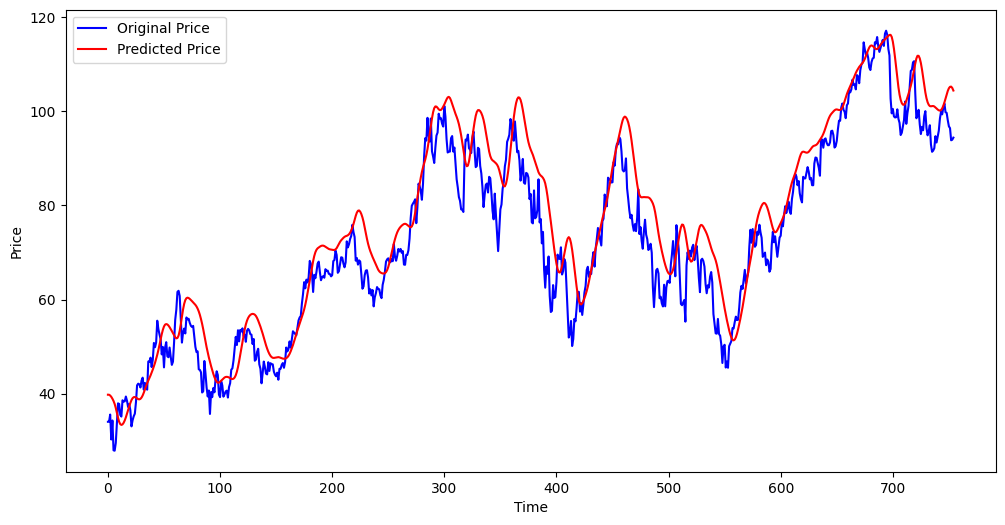

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()